

 # **Tarea 1**: EDA con “House Sales in King County, USA”

 **Integrantes:**
 * Almendra Orellana
 * Kevin Ortiz
 * Jorge Pastene



In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/housesalesprediction


**4.1 Carga y exploración básica.**

In [ ]:
import pandas as pd

df = pd.read_csv( path + "/kc_house_data.csv")

Procedemos a mostrar las primeras 5 filas de datos

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Luego, mostramos un resumen de la estructura del DataFrame.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Notemos que en ninguna columna existen datos nulos, lo cual puede
significar una ventaja.

Por otro lado tenemos:
*   5 columnas con datos "float".
*   15 columnas con datos "int".
*   1 columna con datos "object".


**4.2 Limpieza y manejo de datos.**

Ahora, mostramos las principales medidas estadísticas aplicadas a nuestros datos.

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Notemos que la columna date viene en un formato que el programa lo reconoce
como "object", por lo que para trabajarlo debemos convertirlo.

In [ ]:
df["date"] = pd.to_datetime(df["date"])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Ahora, como podemos notar la columna fecha viene expresada en un formato el
cual se puede trabajar.

In [ ]:
# Procederemos a explorar la columna bedrooms y la columna bathrooms para
# observar si hay datos atipicos.

df["bedrooms"].value_counts().sort_values(ascending=False)

,count
bedrooms,
3,9824
4,6882
2,2760
5,1601
6,272
1,199
7,38
0,13
8,13


En este caso podemos notar que hay una propiedad que dice poseer 33
habitaciones, y por el contrario hay 13 propiedades que dicen poseer 0
habitaciones.

In [ ]:
df["bathrooms"].value_counts().sort_values(ascending=False)

,count
bathrooms,
2.50,5380
1.00,3852
1.75,3048
2.25,2047
2.00,1930
1.50,1446
2.75,1185
3.00,753
3.50,731


En este caso no hay un dato que se escape de manera extrema de los demás , pero
si hay casos que se escapan de la media, como dos que dicen poseer 8 baños.
Aquí lo atípico se puede evidenciar en 10 propiedades que dicen poseer 0 baños.

**4.3 Estadística descriptiva avanzada.**

In [ ]:
# Procederemos a calcular la media, mediana, IQR y el rango de los valores claves

Q1 = df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']].quantile(0.25)
Q3 = df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']].quantile(0.75)
iqr = Q3 - Q1

min = df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']].min()
max = df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']].max()
range = max - min

result = df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']].agg(['mean', 'median'])

result.loc['IQR'] = iqr.values
result.loc['range'] = range.values
result

result

,price,sqft_living,sqft_lot,sqft_above,sqft_basement
mean,5.400881e+05,2079.899736,1.510697e+04,1788.390691,291.509045
median,4.500000e+05,1910.000000,7.618000e+03,1560.000000,0.000000
IQR,3.230500e+05,1123.000000,5.648000e+03,1020.000000,560.000000
range,7.625000e+06,13250.000000,1.650839e+06,9120.000000,4820.000000


In [ ]:
# Procedamos con el tratamiento de los datos outliers para las columnas price y
# sqft_living a través del método IQR.

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculamos el rango intercuartil
IQR = Q3 - Q1

# Se define los cotas superiores e inferiores
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificamos los outliers
outliers_price = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

In [ ]:
outliers_price['price'].sort_values(ascending=False)

,price
7252,7700000.0
3914,7062500.0
9254,6885000.0
4411,5570000.0
1448,5350000.0
...,...
3103,1130000.0
11927,1130000.0
4623,1130000.0
4680,1130000.0


In [ ]:
# Ahora para sqft_living tenemos que

Q1 = df['sqft_living'].quantile(0.25)
Q3 = df['sqft_living'].quantile(0.75)

# Calculamos el rango intercuartil
IQR = Q3 - Q1

# Se define los cotas superiores e inferiores
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificamos los outliers
outliers_sqft_living = df[(df['sqft_living'] < lower_bound) | (df['sqft_living'] > upper_bound)]

In [ ]:
outliers_sqft_living['sqft_living'].sort_values(ascending=False)

,sqft_living
12777,13540
7252,12050
3914,10040
9254,9890
8092,9640
...,...
16389,4240
17001,4240
4626,4240
6906,4240


Seguimos con las observaciones de distribución de variables categóricas.

In [ ]:
import matplotlib.pyplot as plt

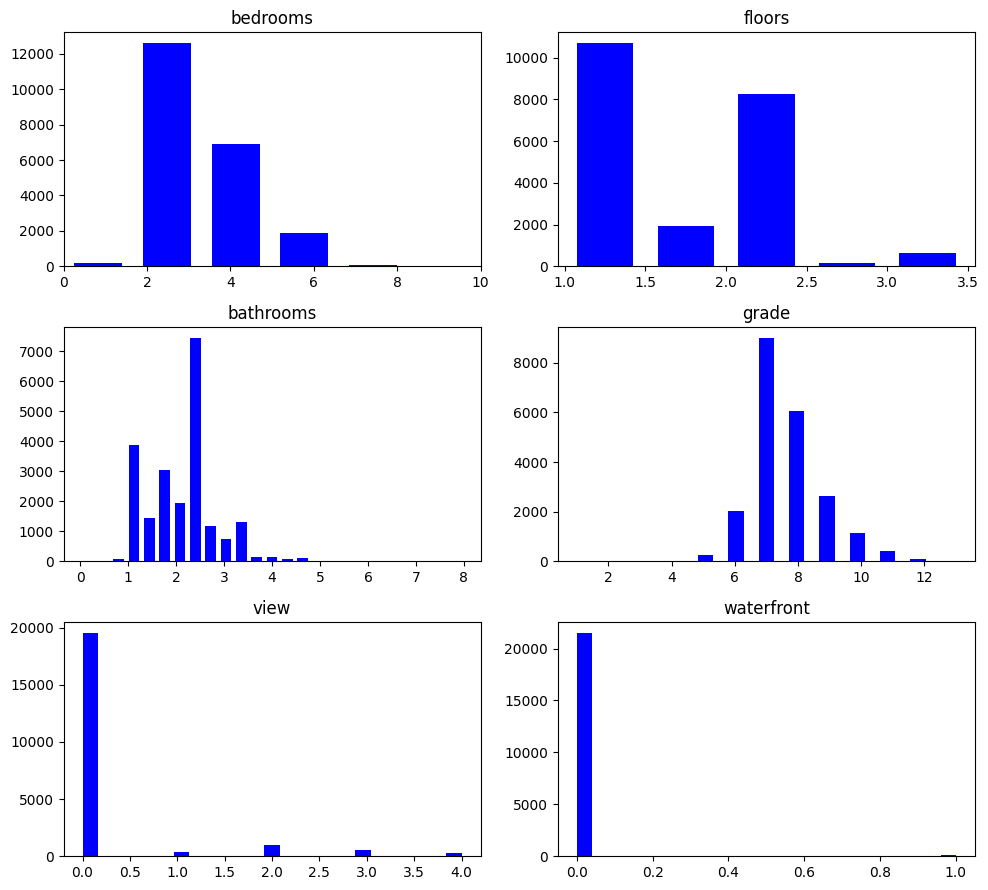

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10, 9))

axs[0,0].hist(df['bedrooms'], bins=20, color='blue',rwidth=0.7)
axs[0,0].set_xlim(0, 10)
axs[0,0].set_title('bedrooms')

axs[0,1].hist(df['floors'], bins=5, color='blue',rwidth=0.7)
axs[0,1].set_title('floors')

axs[1,0].hist(df['bathrooms'], bins=25, color='blue',rwidth=0.7)
axs[1,0].set_title('bathrooms')

axs[1,1].hist(df['grade'], bins=25, color='blue',rwidth=1)
axs[1,1].set_title('grade')

axs[2,0].hist(df['view'], bins=25, color='blue',rwidth=1)
axs[2,0].set_title('view')

axs[2,1].hist(df['waterfront'], bins=25, color='blue',rwidth=1)
axs[2,1].set_title('waterfront')

plt.tight_layout()
plt.show()

**Observaciones:**
* Notemos que para la variables bedrooms, grade, view y waterfront, como hay frecuencias muy altas, gráficamente se pierde la información de aquellas que en frecuencia son menores.
* Para la variable "floors" como son solo 5 diferentes casos, la frecuencia no afecta, por lo que gráficamente podemos observarlos todos con facilidad.

**4.4 Visualizaciones.**

In [ ]:
# Usemos Boxplot para identificar los outliers en la columna price

import seaborn as sns

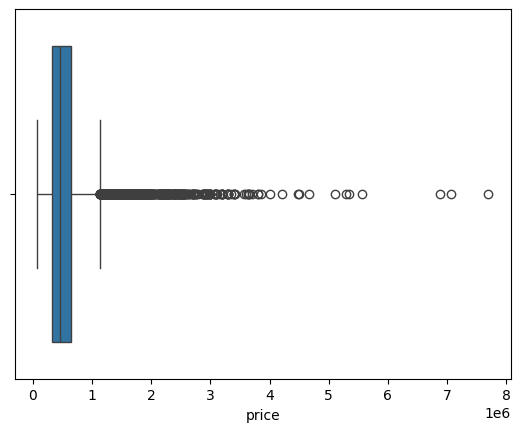

In [ ]:
sns.boxplot(x=df['price'])
plt.show()

Notar que existen muchos datos outlier para la variable "price", sin embargo es importante mantenerlos ya que al momento de hacer predicciones es necesario conocer las caracteristicas que hacen que una propiedad tenga un valor alto.

In [ ]:
df['price'].value_counts().sort_values(ascending=False)

# En este caso, como los precios varían notablemente, para generar el histograma
# eliminaremos los datos outliers y así veremos la distribucion de 'price'

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculamos el rango intercuartil
IQR = Q3 - Q1

# Se define los cotas superiores e inferiores
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificamos los outliers
outliers_price = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

(array([581., 260., 118.,  74.,  45.,  29.,  17.,   7.,   4.,   1.,   3.,
          0.,   3.,   1.,   0.,   0.,   0.,   1.,   1.,   1.]),
 array([1130000., 1458500., 1787000., 2115500., 2444000., 2772500.,
        3101000., 3429500., 3758000., 4086500., 4415000., 4743500.,
        5072000., 5400500., 5729000., 6057500., 6386000., 6714500.,
        7043000., 7371500., 7700000.]),
 <BarContainer object of 20 artists>)

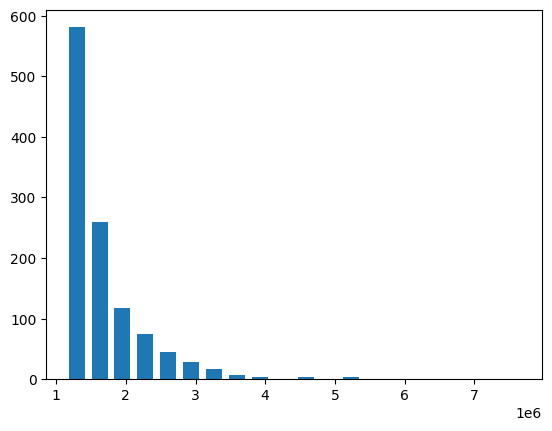

In [ ]:
plt.hist(outliers_price['price'],bins=20,rwidth=0.7)

Como podemos observar el gráfico tiene un comportamiento exponencial negativo,
lo cual haría referencia a que mientras el precio de la propiedad se eleve,
la frecuencia de las mismas disminuye drásticamente, lo cual tiene sentido.

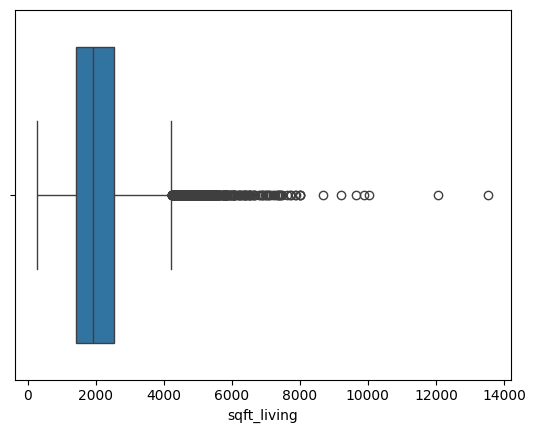

In [ ]:
sns.boxplot(x=df['sqft_living'])
plt.show()

Se puede apreciar que hay una gran cantidad de datos outliers.

In [ ]:
df['sqft_living'].value_counts().sort_values(ascending=False)

# Al igual que en el caso de price, los pies cuadrados de la vivienda varían
# demasiado en función de la propiedad que se observa, por lo que también se
# procederá a eliminar los datos outliers.

Q1 = df['sqft_living'].quantile(0.25)
Q3 = df['sqft_living'].quantile(0.75)

# Calculamos el rango intercuartil
IQR = Q3 - Q1

# Se define los cotas superiores e inferiores
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificamos los outliers
outliers_sqft_living = df[(df['sqft_living'] < lower_bound) | (df['sqft_living'] > upper_bound)]

(array([290., 101.,  78.,  43.,  21.,  11.,  13.,   5.,   3.,   1.,   1.,
          1.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([ 4240.,  4705.,  5170.,  5635.,  6100.,  6565.,  7030.,  7495.,
         7960.,  8425.,  8890.,  9355.,  9820., 10285., 10750., 11215.,
        11680., 12145., 12610., 13075., 13540.]),
 <BarContainer object of 20 artists>)

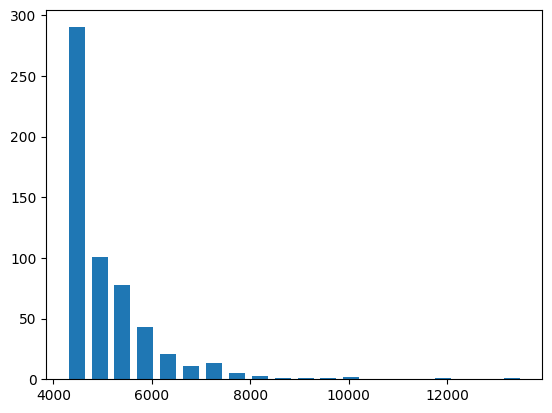

In [ ]:
plt.hist(outliers_sqft_living['sqft_living'],bins=20,rwidth=0.7)

Al igual que en el caso del precio, mientras la propiedad tiene un terreno más
extenso, la frecuencia de las mismas decae drásticamente, explicando así el
comportamiento de exponencial negativo del gráfico nuevamente.

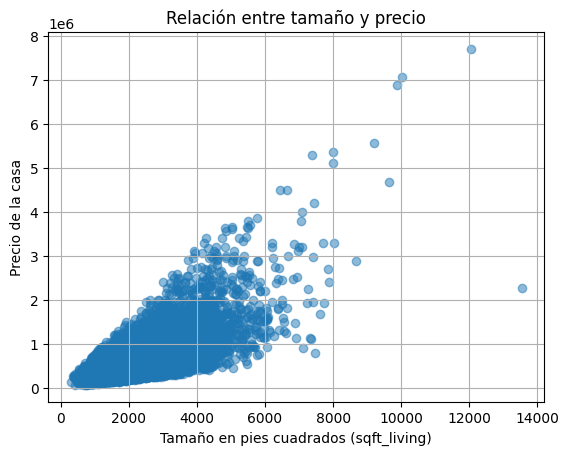

In [ ]:
# Utilicemos ScatterPlot para realizar una comparación entre los pies cuadrados
# de la propiedad y el precio

plt.scatter(df['sqft_living'], df['price'], alpha=0.5)

plt.xlabel('Tamaño en pies cuadrados (sqft_living)')
plt.ylabel('Precio de la casa')
plt.title('Relación entre tamaño y precio')
plt.grid(True)
plt.show()


In [ ]:
# Convertiremos a "string" aquellas variables que no tienen sentido de analizar en la matriz
# de correlación.

df['id']=df['id'].astype(str)
df['lat']=df['lat'].astype(str)
df['long']=df['long'].astype(str)
df['zipcode']=df['zipcode'].astype(str)


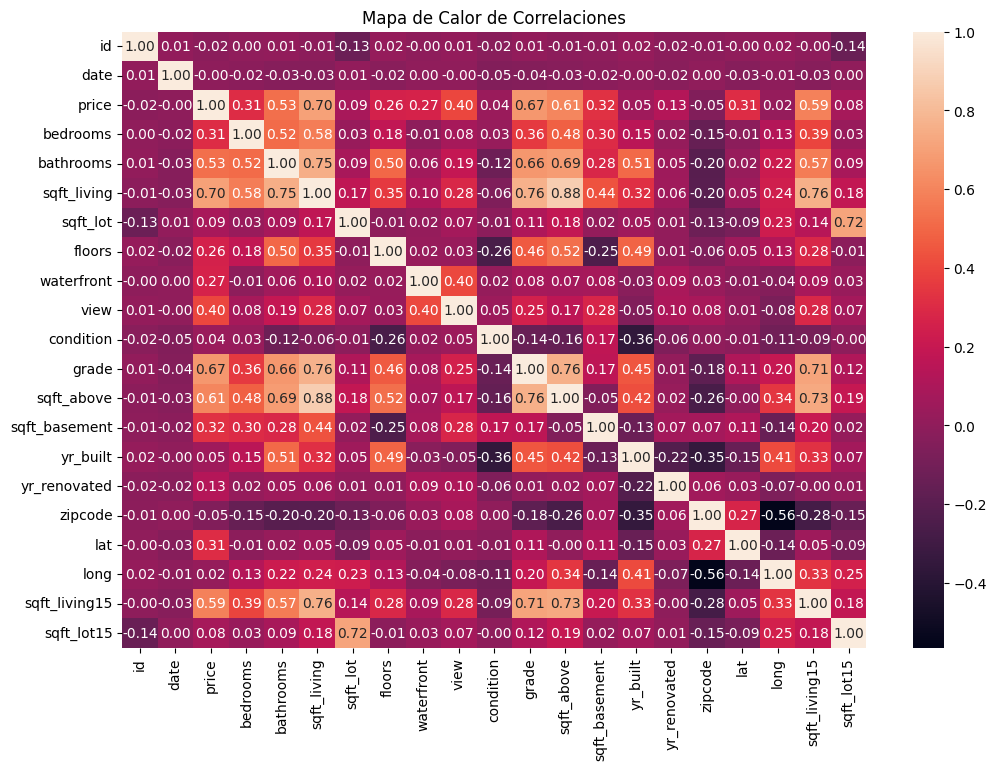

In [ ]:
# Generemos un mapa de calor para las correlaciones entre las variables

correlation_matrix = df.corr()

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Mapa de Calor de Correlaciones')
plt.show()

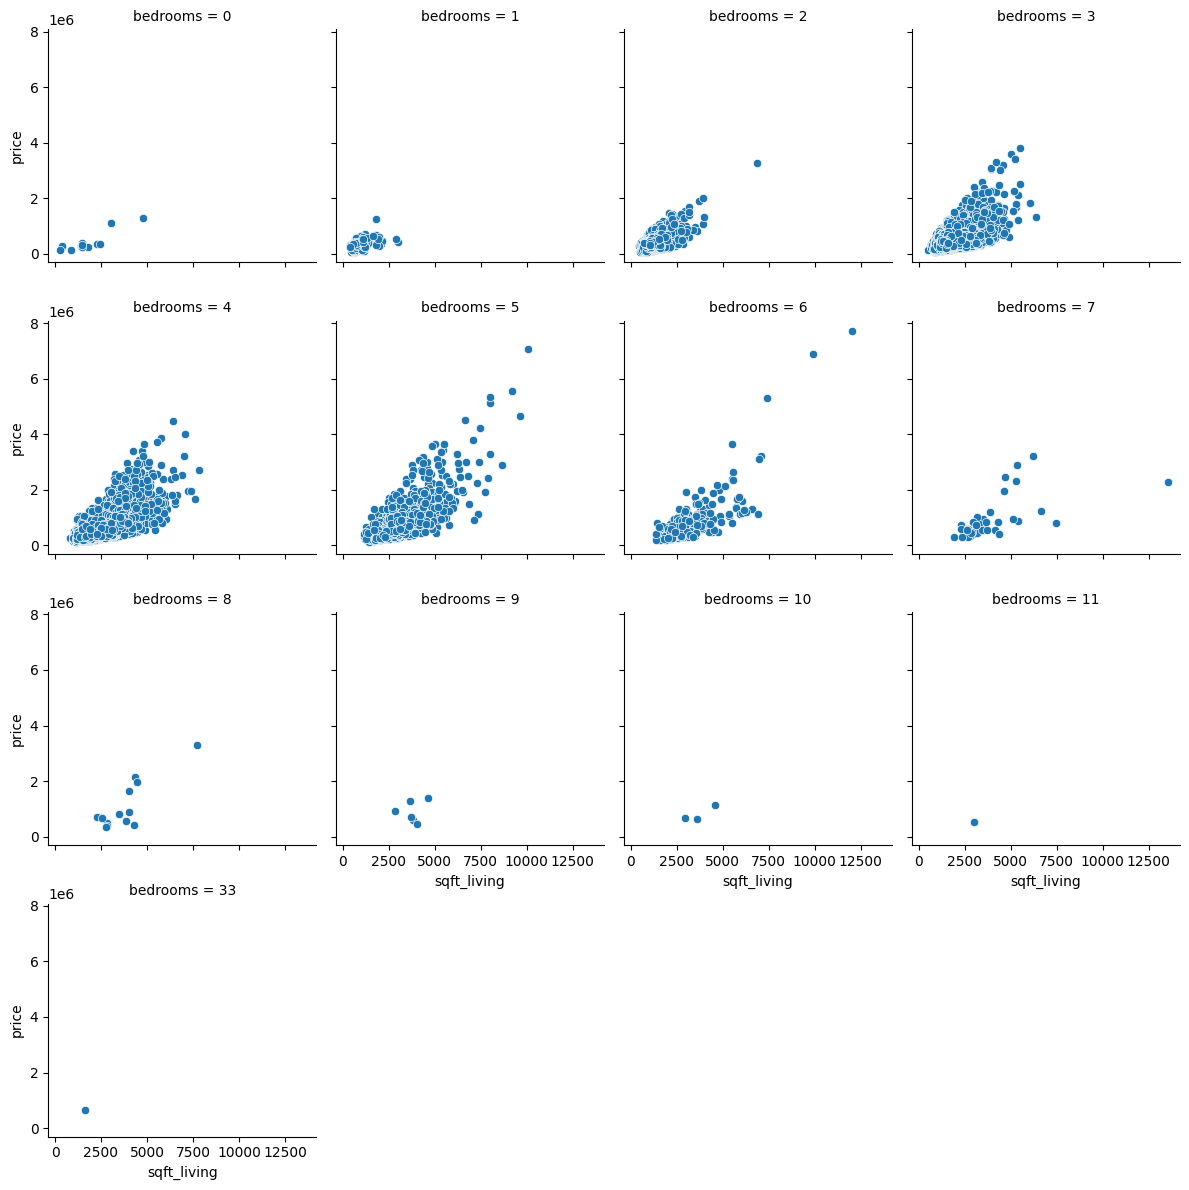

In [ ]:
g = sns.FacetGrid(df, col='bedrooms', col_wrap=4)
g.map_dataframe(sns.scatterplot, x='sqft_living', y='price')
plt.show()

# Con esta función podemos analizar los distintos graficos entre pies cuadrados
# de la viviendo y precio dependiendo del número de habitaciones que posee

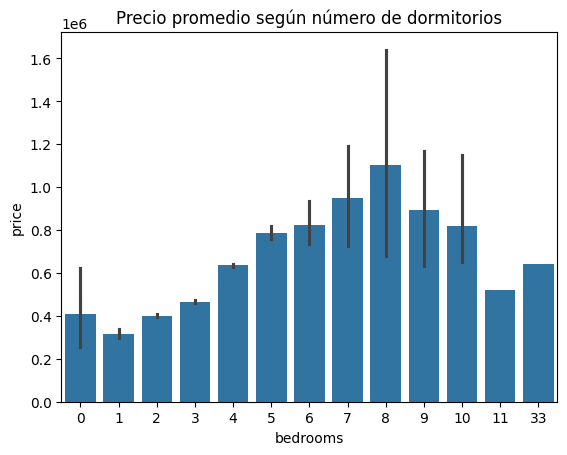

In [ ]:
sns.barplot(data=df, x='bedrooms', y='price')
plt.title('Precio promedio según número de dormitorios')
plt.show()

# Aquí podemos observar el precio promedio de las propiedades dependiendo del
# número de habitaciones que posee

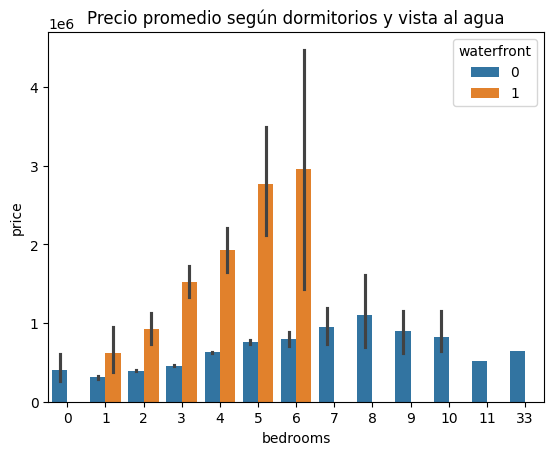

In [ ]:
sns.barplot(data=df, x='bedrooms', y='price', hue='waterfront')
plt.title('Precio promedio según dormitorios y vista al agua')
plt.show()

# Aquí podemos observar el precio promedio de la propiedad dependiendo del
# número de habitaciones las cuales están separadas dependiendo si poseen
# o no vista al lago

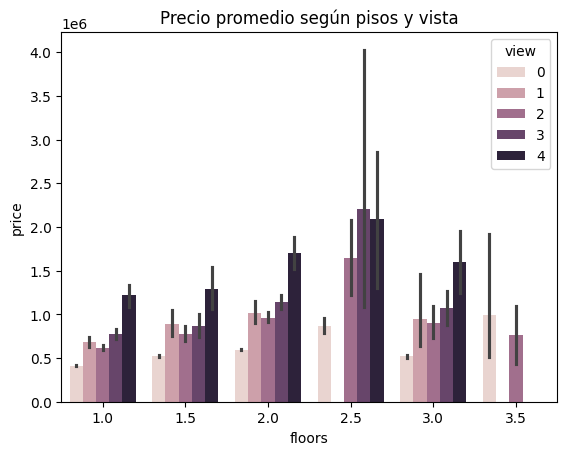

In [ ]:
sns.barplot(data=df, x='floors', y='price', hue='view')
plt.title('Precio promedio según pisos y vista')
plt.show()

# Aquí podemos observar el precio promedio de la propiedad dependiendo del
# número de pisos que posee y el cual está separado dependiendo de la calificación
# de la vista

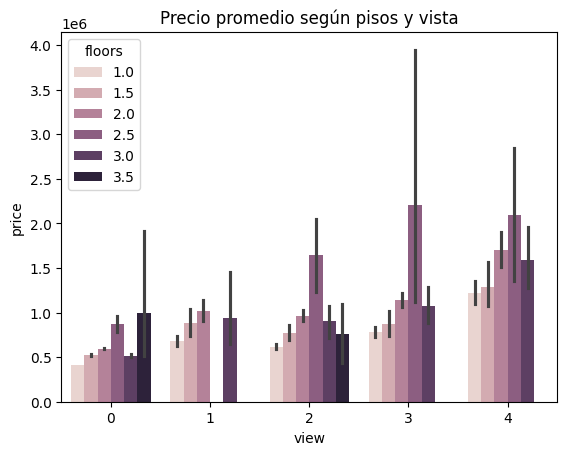

In [ ]:
sns.barplot(data=df, x='view', y='price', hue='floors')
plt.title('Precio promedio según pisos y vista')
plt.show()

# Aquí podemos observar el precio promedio de la propiedad dependiendo de la
# calificación de la vista la cual está separada por el número de pisos que
# posee

**4.5 Análisis de correlación.**

In [ ]:
# Examinemos la matriz de correlación para analizar la relación entre las
# distintas variables

df.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005577,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,...,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
date,0.005577,1.000000,-0.004357,-0.016800,-0.034410,-0.034559,0.006313,-0.022491,0.001356,-0.001800,...,-0.039912,-0.027924,-0.019469,-0.000355,-0.024509,0.001404,-0.032856,-0.007020,-0.031515,0.002566
price,-0.016762,-0.004357,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,...,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,-0.016800,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,...,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,-0.034410,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,...,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,-0.034559,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,...,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.006313,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,...,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,-0.022491,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,...,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.001356,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,...,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,-0.001800,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,...,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575


Notemos que la correlación mas alta y mas baja con price son sqft_living y
zipcode respectivamente. La primera tiene sentido que tengan una correlación
alta, ya que mientras la vivienda posea un terreno más amplio el valor debería
tender a subir. Por otro lado, la segunda no tiene una relevancia explicable.

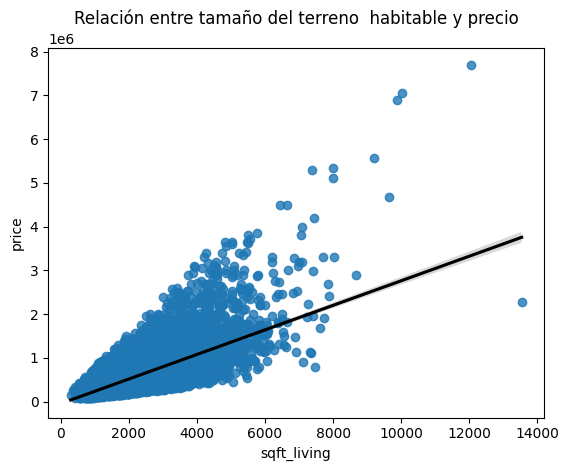

In [ ]:
# Elegiremos las correlaciones de grade/sqft_living (0.76) y
# price/sqft_living (0.7). Construyamos dos gráficos para poder visualizar este
# comportamiento

# Price/Sqft_living

sns.regplot(data=df, x='sqft_living', y='price',line_kws={'color': 'black'})
plt.title('Relación entre tamaño del terreno habitable y precio')
plt.show()

Podemos observar que el gráfico responde al hecho que la correlación de las variables es cercana a 1. Además mientras el tamaño del terreno
aumenta, el precio de la propiedad tiende a ser mayor, es decir
 tiene una correlación positiva.


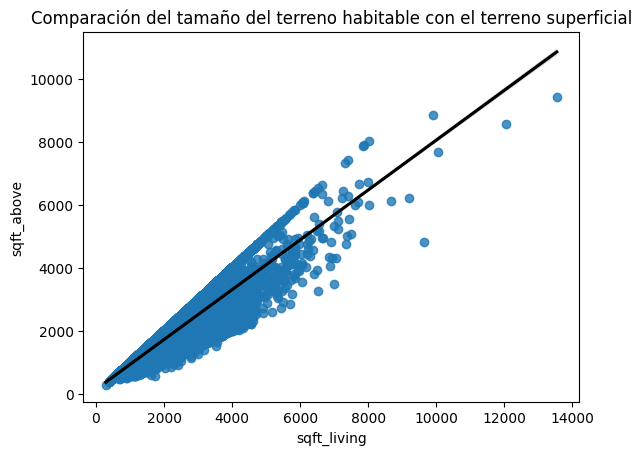

In [ ]:
#sqft_living/ sqft_above
sns.regplot(data=df, x='sqft_living', y='sqft_above',line_kws={'color': 'black'})
plt.title('Comparación del tamaño del terreno habitable con el terreno superficial')
plt.show()

Notemos que este gráfico marca una alta tendencia lineal, esto se debe al hecho que sqft_above = sqft_living - sqft_basement.

**4.6 Conclusiones.**





Las variables que más influye en el precio es el tamaño del terreno habitable, la calificación, el número de baños y el tamaño de la superficie del terreno.

**Datos curiosos:** Los datos anormales que observamos en el dataset son los siguientes:
*   Una propiedad con 33 habitaciones.
   *  Notemos que esta propiedad posee 1.75 baños, un piso y el tamaño de 1620 sqft, lo cual no hace sentido.
*   10 propiedades con 0 baños.
   *   Siete de estas propiedades no poseen habitación, de las cuales una destaca por tener un precio muy elevado de 1295650 dolares.
*  Hay una propiedad que dice poseer 11 habitaciones y al buscar sus coordenadas en google maps descubrimos que en realidad la propiedad es una especie de bodega.
*  Existe una propiedad cuyo tamaño de lote es 1651359 sqft, pero posee 1 piso, 1 baño y 4 habitaciones. Además el tamaño del terreno habitable es solo 1300 sqft, pero al buscar la propiedad en google maps, esta corresponde a un campo llano.
* Hay una propiedad que tiene 1 solo piso y que no posee sotano, sin embargo el tamaño habitable es más grande que el tamaño de lote.

**Idea para un eventual modelo predictivo:**

**Idea 1:** Podriamos utilizar las variables "sqft_living", "grade" y "bathrooms" para predecir el precio de la propiedad.

**Idea 2:** Predecir la calificación de la propiedad en función de "sqft_above", "bathrooms" y "sqft_living15".

**Idea 3:** Eliminar las filas que no poseen año de renovación para observar que las variables "condition" y "yr_built" están correlacionadas con "yr_renovated" y asi usar estar dos variables ("condition" y "yr_built") para predecir el año de renovación.